Data shape: (20000, 64, 64, 1)
Training on 16000 samples, testing on 4000 samples


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.7038 - loss: 0.8987 - val_accuracy: 0.9980 - val_loss: 0.0114
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9932 - loss: 0.0234 - val_accuracy: 0.9975 - val_loss: 0.0078
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9982 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 5.0431e-04
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9988 - loss: 0.0056 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 5.7054e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9987 - val_loss: 0.0041
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9977 - loss: 0.0061 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9996 - loss: 0

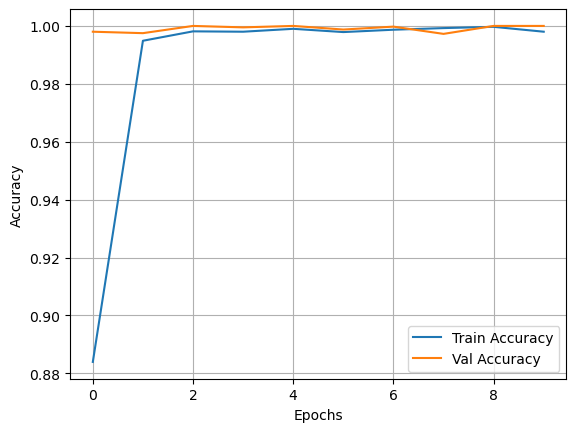

Model saved as gesture_recognition_model.h5


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense


DATA_DIR = r"C:\Users\shiva\OneDrive\Desktop\ML TASK 4\leapGestRecog"
IMG_SIZE = 64

# Dynamically detect gesture folders from first session
sample_session = os.path.join(DATA_DIR, os.listdir(DATA_DIR)[0])
gestures = sorted(os.listdir(sample_session))

data = []
labels = []


for session in os.listdir(DATA_DIR):
    session_path = os.path.join(DATA_DIR, session)
    if not os.path.isdir(session_path):
        continue
    for label_idx, gesture in enumerate(gestures):
        gesture_path = os.path.join(session_path, gesture)
        if not os.path.exists(gesture_path):
            continue
        for img_name in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label_idx)


data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
labels = to_categorical(labels, num_classes=len(gestures))


X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

print(f"Data shape: {data.shape}")
print(f"Training on {X_train.shape[0]} samples, testing on {X_test.shape[0]} samples")


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(gestures), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


model.save("gesture_recognition_model.h5")
print("Model saved as gesture_recognition_model.h5")
